In [ ]:
# #mounting drive
# from google.colab import drive
# drive.mount('/content/drive')

Goal:

**Phase 1: Strategic Understanding**

Mobile price classification dataset holds crucial attributes for predicting mobile price ranges based on mobile features. The mobile phone industry can leverage this classification model to make data-driven decisions, enhance pricing accuracy, market campaigns, and efficient inventory control. The objective of this classification model is to categorize mobile phones into low cost, medium cost, high cost, and very high-cost categories based mobile features like ram, battery power, pixel height., etc. To cater to diverse customers strategic pricing in the mobile industry is required. By data analysis companies can aim at determining phone characteristics contributing towards price segments. Businesses can optimize their pricing strategy and make informed decisions on discounts, promotions, and plan product bundles. This dataset also reveals rising demand for storage space in phones, battery life, and the need for advanced cameras. Insights into feature-based mobile price classification will help the business in understanding customer purchasing motivation. This classification model will also help the customer in making informed decisions about phone purchase.

**Phase 2: Data Collection and Data Insights**

The data is sourced from Kaggle in a csv file.

In [1]:
#read csv file
import pandas as pd
raw_data = pd.read_csv('/content/drive/My Drive/Colab_Notebooks/Mobile_Classification/train.csv')
raw_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
print(raw_data['fc'].value_counts())

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64


In [3]:
raw_data.shape

(2000, 21)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#changing some of the column names for better understanding of the data description
raw_data.rename(columns={
    'blue': 'bluetooth',
    'fc': 'frnt_cam',
    'm_dep': 'moble_depth',
    'pc': 'prmry_cam',
    'sc_h': 'scrn_height',
    'sc_w': 'scrn_width'
}, inplace=True)

In [6]:
raw_data['price_range'].unique()

array([1, 2, 3, 0])

Price Range is the target variable which is of int data type. Looking at the dataset it is better to convert it to categorical type and categorizing it into low - 0, medium - 1, high - 2 and very high - 3 price range for better model explainability.

In [7]:
#converting the price range to low, medium, high and very high range
price_map = {
    1:'Medium Cost',
    2:'High Cost',
    3:'Very High Cost',
    0:'Low Cost'
    }

raw_data_converted = raw_data.copy()
raw_data_converted['price_range'] = raw_data_converted['price_range'].map(price_map)
raw_data_converted['price_range'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: price_range
Non-Null Count  Dtype 
--------------  ----- 
2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [8]:
raw_data_converted.head(4)

,battery_power,bluetooth,clock_speed,dual_sim,frnt_cam,four_g,int_memory,moble_depth,mobile_wt,n_cores,...,px_height,px_width,ram,scrn_height,scrn_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,Medium Cost
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,High Cost
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,High Cost
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,High Cost


**Data Cleaning**

**1. There are no missing values in the dataset**

In [9]:
#looking for any missing values and obtaining only the columns with missing values
print(raw_data_converted.isna().any()[raw_data_converted.isna().any()])

Series([], dtype: bool)


**2. There are no duplicate values in the dataset**

In [10]:
raw_data_converted.duplicated().sum()

np.int64(0)

**Class Imbalance**

**Target Class is balanced** - The price range attribute has equally distributed number of records.

In [11]:
raw_data_converted['price_range'].value_counts()

,count
price_range,
Medium Cost,500
High Cost,500
Very High Cost,500
Low Cost,500


**Phase 3: Determining and Depicting Outliers:**

In [12]:
raw_data_converted.describe()

,battery_power,bluetooth,clock_speed,dual_sim,frnt_cam,four_g,int_memory,moble_depth,mobile_wt,n_cores,prmry_cam,px_height,px_width,ram,scrn_height,scrn_width,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


From data we see that some records have no primary camera but still has pixel resolution height and width. This can be treated as manual error and hence deleting those records.

Some records dont have pixel resolution height but still has pixel resolution width which is impractical hence these records can be deleted.

In [13]:
#There are 101 records with 0 primary camera
raw_data_converted[raw_data_converted['prmry_cam'] == 0]['prmry_cam'].value_counts()

,count
prmry_cam,
0,101


In [14]:
raw_data_converted[(raw_data_converted['prmry_cam'] == 0) & (raw_data_converted['px_height'] != 0)].value_counts().sum()

np.int64(101)

In [15]:
raw_data_converted[(raw_data_converted['prmry_cam'] == 0) & (raw_data_converted['px_width'] != 0)].value_counts().sum()

np.int64(101)

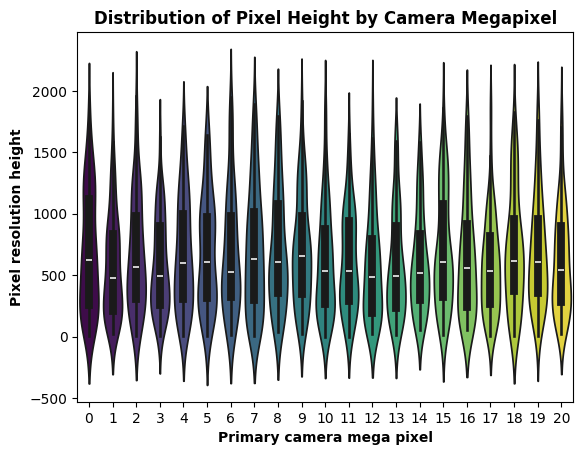

In [16]:
#creating violin plot to visualize distribution of Pixel Height by Camera Megapixel
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='prmry_cam', y = 'px_height', data = raw_data_converted, palette='viridis',hue='prmry_cam', legend=False)
plt.xlabel('Primary camera mega pixel', fontweight='bold')
plt.ylabel('Pixel resolution height', fontweight='bold')
plt.title('Distribution of Pixel Height by Camera Megapixel', fontweight='bold')
plt.show()

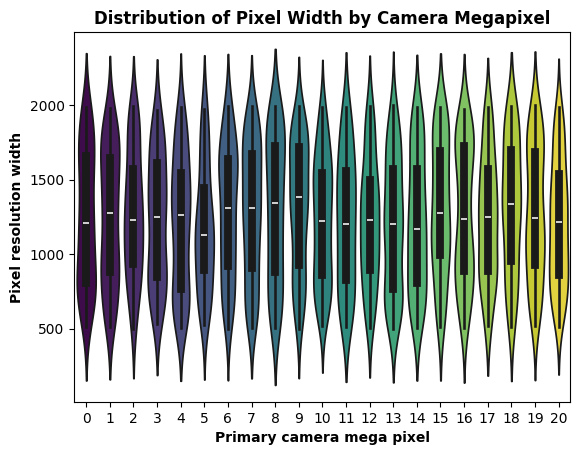

In [17]:
#creating violin plot to visualize distribution of Pixel width by Camera Megapixel
sns.violinplot(x='prmry_cam', y = 'px_width', data = raw_data_converted, palette='viridis',hue='prmry_cam', legend=False)
plt.xlabel('Primary camera mega pixel', fontweight='bold')
plt.ylabel('Pixel resolution width', fontweight='bold')
plt.title('Distribution of Pixel Width by Camera Megapixel', fontweight='bold')
plt.show()

In [18]:
#getting the records which doesn't have 0 primary camera.
clean_data = raw_data_converted[~(raw_data_converted['prmry_cam'] == 0)]
clean_data.shape

(1899, 21)

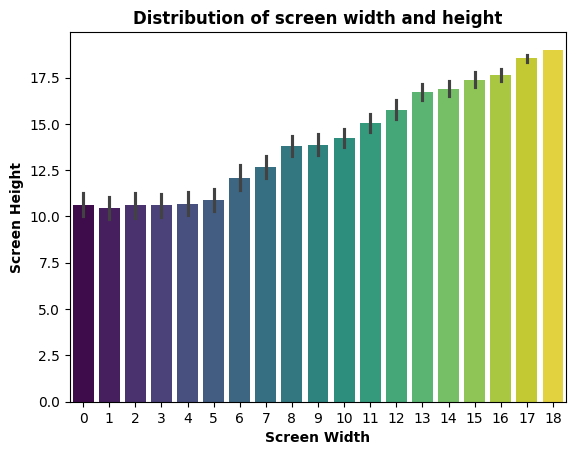

In [19]:
#creating violin plot to understand screen_width and screen_height distribution
sns.barplot(x='scrn_width', y= 'scrn_height', data = clean_data, palette = 'viridis', hue='scrn_width', legend=False)
plt.xlabel('Screen Width', fontweight='bold')
plt.ylabel('Screen Height', fontweight = 'bold')
plt.title('Distribution of screen width and height', fontweight='bold')
plt.show()

We have records with 0cm screen width but still have screen height which seems like manual error and hence these records can be deleted.

In [20]:
clean_data[(clean_data['scrn_width'] == 0) & (clean_data['scrn_height'] != 0)].value_counts().sum()

np.int64(167)

Dropping 167 records with 0 screen width but still having screen height.

In [21]:
clean_data = clean_data[~((clean_data['scrn_width'] == 0) & (clean_data['scrn_height'] != 0))]

In [22]:
clean_data.shape

(1732, 21)

**Exploratory Data Analysis**

**Correlation Heatmap**

In [34]:
correlation_matrix = raw_data.corr()
# plt.figure(figsize=(15,10))
# sns.heatmap(correlation_matrix, annot =True, cmap = 'Purples',linewidths = 0.2)
# plt.title('Correlation Heatmap', fontweight = 'bold')
# plt.show()
#Removed plot image from here and added in read.me file as the image was huge in size.

By picturing a correlation heatmap one can effortlessly depict the patterns and relations in the dataset. The correlation Heatmap interpret that the below features have positive correlation, for example as ram_mb increases price_range increases. ​

1. ram_mb and target variable price_range. ​

2. three_g and four_g ​

3. prm_cam_mp and front_cam ​

4. px_res_wdt and px_res_ht  ​

**Phase 4: Model Design**

In [27]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X = clean_data.drop('price_range', axis = 1)
y = clean_data['price_range']
#splitting the data into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)

In [28]:
#1. Building Support Vector Machines
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

svc_clf = SVC(random_state = 1)
svc_clf.fit(X_train, y_train)
y_predict = svc_clf.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm_dct = pd.DataFrame(confusion_matrix(y_test, y_predict, labels =['Medium Cost','High Cost', 'Very High Cost', 'Low Cost']),
                          index = ['actual Medium', 'actual High', 'actual Very High','actual Low'],
                          columns = ['predicted medium','predicted high','predicted very high','predicted low'])
print('SVM Confusion Matrix :\n',cm_dct )
print('Accuracy :\n', accuracy_score(y_test, y_predict))
print('Precision : \n', precision_score(y_test, y_predict, average = 'weighted'))
print('Recall : \n', recall_score(y_test, y_predict,average = 'weighted'))
print('F1 Score : \n', f1_score(y_test, y_predict, average = 'weighted'))


SVM Confusion Matrix :
                   predicted medium  predicted high  predicted very high  \
actual Medium                   39               1                    0   
actual High                      3              33                    2   
actual Very High                 0               3                   44   
actual Low                       0               0                    0   

                  predicted low  
actual Medium                 2  
actual High                   0  
actual Very High              0  
actual Low                   47  
Accuracy :
 0.9367816091954023
Precision : 
 0.9363795763453078
Recall : 
 0.9367816091954023
F1 Score : 
 0.9364020207638116


In [29]:
#2. Logistic Regression
from sklearn.linear_model import LogisticRegression

#splitting the data into 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)

lr_clf = LogisticRegression(random_state = 1)
lr_clf.fit(X_test, y_test)
y_predict = lr_clf.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm_dct = pd.DataFrame(confusion_matrix(y_test, y_predict, labels =['Medium Cost','High Cost', 'Very High Cost', 'Low Cost']),
                          index = ['actual Medium', 'actual High', 'actual Very High','actual Low'],
                          columns = ['predicted medium','predicted high','predicted very high','predicted low'])
print('Logistic Regression Confusion Matrix :\n',cm_dct )
print('Accuracy :\n', accuracy_score(y_test, y_predict))
print('Precision : \n', precision_score(y_test, y_predict, average = 'weighted'))
print('Recall : \n', recall_score(y_test, y_predict,average = 'weighted'))
print('F1 Score : \n', f1_score(y_test, y_predict, average = 'weighted'))

Logistic Regression Confusion Matrix :
                   predicted medium  predicted high  predicted very high  \
actual Medium                   24              10                    1   
actual High                      8              16                   14   
actual Very High                 0               9                   38   
actual Low                       9               0                    0   

                  predicted low  
actual Medium                 7  
actual High                   0  
actual Very High              0  
actual Low                   38  
Accuracy :
 0.6666666666666666
Precision : 
 0.6628953823076044
Recall : 
 0.6666666666666666
F1 Score : 
 0.663751596721857


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
#3. Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier(random_state = 1)
dtc_clf.fit(X_train, y_train)
y_predict = dtc_clf.predict(X_test)

#Analysing models performance via confusion matrix, accuracy, precision, recall, and F1 score
cm_dct = pd.DataFrame(confusion_matrix(y_test, y_predict, labels =['Medium Cost','High Cost', 'Very High Cost', 'Low Cost']),
                          index = ['actual Medium', 'actual High', 'actual Very High','actual Low'],
                          columns = ['predicted medium','predicted high','predicted very high','predicted low'])
print('Decision Tree Classifier Confusion Matrix :\n',cm_dct )
print('Accuracy :\n', accuracy_score(y_test, y_predict))
print('Precision : \n', precision_score(y_test, y_predict, average = 'weighted'))
print('Recall : \n', recall_score(y_test, y_predict,average = 'weighted'))
print('F1 Score : \n', f1_score(y_test, y_predict, average = 'weighted'))

Decision Tree Classifier Confusion Matrix :
                   predicted medium  predicted high  predicted very high  \
actual Medium                   39               0                    0   
actual High                      2              34                    2   
actual Very High                 0               4                   43   
actual Low                       3               0                    0   

                  predicted low  
actual Medium                 3  
actual High                   0  
actual Very High              0  
actual Low                   44  
Accuracy :
 0.9195402298850575
Precision : 
 0.9203355393010566
Recall : 
 0.9195402298850575
F1 Score : 
 0.9197000337040783


In [35]:
#decision tree visualization
# from sklearn.tree import plot_tree
# plt.figure(figsize=(30, 20))
# plot_tree(dtc_clf, filled=True, feature_names = X.columns, class_names=['M', 'H', 'VH', 'L'], rounded = True, fontsize=14, max_depth=2)
# plt.show()

In [37]:
# from sklearn.tree import export_graphviz
# import graphviz

# # Export tree as dot format
# dot_data = export_graphviz(dtc_clf, out_file=None,
#                            feature_names=X.columns,
#                            class_names=['M', 'H', 'VH', 'L'],
#                            filled=True, rounded=True,
#                            special_characters=True)

# # Visualize using graphviz
# graph = graphviz.Source(dot_data)
# #graph.render("decision_tree")  # saves as PDF
# graph

The interpretability of Decision trees gives clear understanding that the instances with greater ram, battery power, pixel resolution height and width pushes the phone range into High or Very High Cost.

**Phase 5: Model Analysis, Model Refinement, Model Review, and Model Performance**

  0%|          | 0/174 [00:00<?, ?it/s]

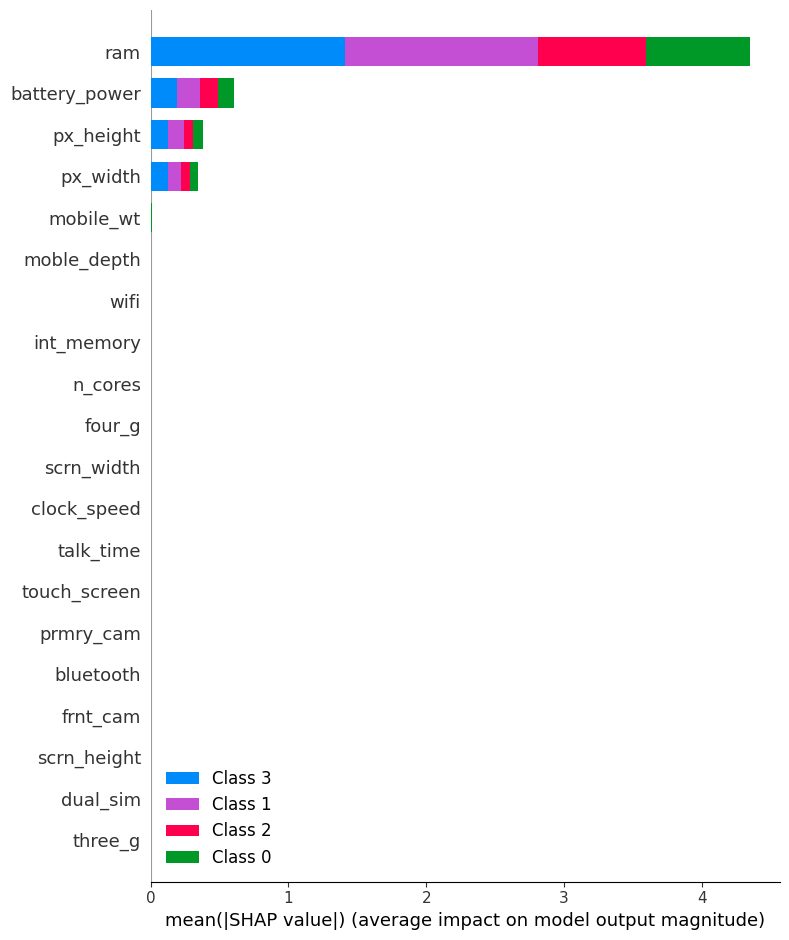

In [ ]:
#1. SHAP analysis to get feature importance -  Support Vector Machines
import shap

#Initializing JS visualization in notebooks
shap.initjs()

#using kernel explainer
#The decision_function is used for multi-class SVC
explainer = shap.KernelExplainer(svc_clf.decision_function, shap.kmeans(X_train, 10))
shap_values = explainer.shap_values(X_test)

#Summary plot (global importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

From SHAP analysis it is evident that the most important features contribuiting towards the prediction of price range are ram, battery_power, px_height, and px_width.

In [ ]:
X = clean_data[['battery_power', 'ram', 'px_height', 'px_width']]
X.shape

(1732, 4)

In [ ]:
#Re-building the model considering only the important features from SHAP analysis
from sklearn.svm import SVC

X = clean_data[['battery_power', 'ram', 'px_height', 'px_width']]
y = clean_data['price_range']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1,random_state =1)

svc_model_1 = SVC(random_state = 1)
svc_model_1.fit(X_train,y_train)
y_predict_svc = svc_model_1.predict(X_test)

#analysing the models performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm_svc = pd.DataFrame(confusion_matrix(y_predict_svc, y_test, labels= ['Medium Cost', 'High Cost', 'Very High Cost', 'Low Cost']),
                      index = ['actual Medium', 'actual High', 'actual Very High', 'actual Low'],
                      columns = ['predicted Medium', 'predicted High', 'predicted Very High', 'predicted Low'])
print('Confusion Matrix of Support Vector Machine Model 1:\n', cm_svc)
print('Accuracy Score :\n', accuracy_score(y_test, y_predict_svc))
print('Precision Score :\n', precision_score(y_test, y_predict_svc, average='weighted'))
print('Recall Score :\n', recall_score(y_test, y_predict_svc, average='weighted'))
print('F1 Score :\n', f1_score(y_test,y_predict_svc, average = 'weighted'))

Confusion Matrix of Support Vector Machine Model 1:
                   predicted Medium  predicted High  predicted Very High  \
actual Medium                   40               3                    0   
actual High                      1              32                    3   
actual Very High                 0               3                   44   
actual Low                       1               0                    0   

                  predicted Low  
actual Medium                 0  
actual High                   0  
actual Very High              0  
actual Low                   47  
Accuracy Score :
 0.9367816091954023
Precision Score :
 0.9360251640975379
Recall Score :
 0.9367816091954023
F1 Score :
 0.9362042516521005


Since there is no difference in models performance with all the features and with most important features, we can consider the model 1 for further performance tuning.

In [ ]:
#2. Hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Lower C = stronger regularization (simpler model), higher C = weaker regularization (less penalty for misclassifications)
#gamma controls how far the influence of a single training example reaches:
#Low gamma = far influence (smooth decision boundary)
#High gamma = close influence (can lead to overfitting)


# param_grid = {#regularization parameter
#     'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['scale','auto'],'kernel' : ['rbf', 'linear']}

# #verbose=1 shows basic progress messages while training.
# grid = GridSearchCV(SVC(random_state = 1),param_grid,cv=StratifiedKFold(n_splits=3), scoring = 'accuracy', verbose = 1, n_jobs=-1)
# grid.fit(X_train, y_train)

# # Best parameters and score
# print("Best parameters:", grid.best_params_)
# print("Best cross-validation score:", grid.best_score_)

# # Predict on test data
# y_pred_test = grid.predict(X_test)